<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <img src="https://upload.wikimedia.org/wikipedia/fa/thumb/f/fd/University_of_Tehran_logo.svg/1200px-University_of_Tehran_logo.svg.png" style="float:left;width:140px;padding-top: 10px" />
    <div style="font-size: 20px;padding-top: 30px;"><b>پروژه سوم : Naive Bayes Classifier</b></div>
    <div style="font-size: 16px;margin-top: 20px;">ثمین مهدی زاده 810196623</div>
</div>

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6"> 
    در این پروژه با استفاده از Naive Base Classifier به تجزیه و تحلیل کامنت ها پرداخته شده و مثبت یا منفی بودن نظرات بر طبق متن آن ها تشخیص داده شده است.
</div>

In [1]:
from hazm import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import numpy as np
import random
import seaborn as seaborn

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6"> 
دو فایل یکی جهت آموزش(comment_train.csv)و دیگری جهت تست و ارزش یابی مدل (comment_test.csv)مورداستفاده قرار گرفته است.
</div>

In [2]:
train = pd.read_csv('CA3_dataset/comment_train.csv')
test = pd.read_csv('CA3_dataset/comment_test.csv')
train

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,بسیار عالی,recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended
...,...,...,...
5995,جنسش عالیه,خیلی جنس پارچش نرم ولطیفه خیلیم جنسش خوبه اما ...,recommended
5996,خرید محصول,سلام.واقعا فکر نمی کردم به این راحتی اصلاح کنم...,recommended
5997,تعریف,من از دیجی کالا خریدم خیلی زود دستم رسید،زیبا،...,recommended
5998,اصلا چای ماچا نیسش,یا شرکت نمیدونسته چای ماچا امپریال چیه یا واقع...,not_recommended


<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6"> 
    همان طور که مشاهده می شود هیچ کدام از داده های آموزشی خالی نیستد و احتیاجی به حذف آنها نداریم.
 </div>

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      6000 non-null   object
 1   comment    6000 non-null   object
 2   recommend  6000 non-null   object
dtypes: object(3)
memory usage: 140.8+ KB


<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6"> 
دو نمودار زیر چگونگی توزیع نظرات را نشان می دهد.در هر دو داده ی آموزشی و تست نظرات مخالف و موافق به یک اندازه بوده است.
</div>

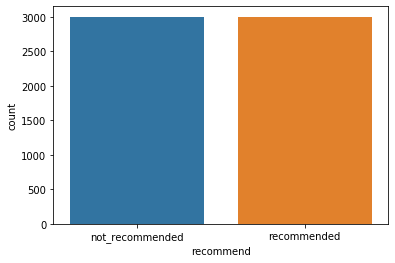

In [4]:
seaborn.countplot(train['recommend'])

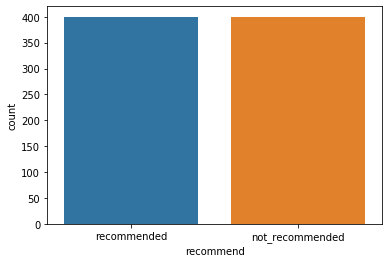

In [5]:
seaborn.countplot(test['recommend'])

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6"> 
    جهت تجزیه و تحلیل کامنت ها کلاس Naïve_bayes زده شده است.پارامتر alpha جهت ورودی به این کلاس داده می شود.درصورتی که این مقدار 0 باشد تحلیل داده ها بدون smoothing صورت می گیرد و در غیر این صورت alpha ضریب اعمال شده در smoothing  است(راجع به smoothing جلو تر صحبت شده است).در ادامه توابع این کلاس را معرفی کرده و توضیح مختصری راجع به هر یک می دهیم.
 </div>

<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <b>پیش پردازش داده</b>
</div>
<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    برای پیش پردازش داده لازم است که آن را از جهات مختلف از جمله حذف کلمات پر تکرار یا stopwords،تبدیل کلمات به ریشه و حذف علاوئم نگارشی فیلتر کنیم.بنابراین در ابتدا به کمک کتابخانه هضم داده ها نرمالایز شدند(فاصله به نیم فاصله تبدیل شده تا کلمات مرتبط جدا از هم در نظر گرفته نشوند).سپس به کمک word_tokenizer داده ها از هم جدا شده و به صورت یک لیست در آمده تا بر روی کلمات آن پردازش شود.در ادامه به کمک stemer و lemmatizer کلمات ریشه یابی شده اند.در انتها نیز stop_wordها یا کلمات پرتکرار حذف شده اند.
    <br>
    جهت پردازش متن و تحلیل اطلاعات از هر دو ستون کامنت وعنوان استفاده شده است.
<br/>
    <b>۱)در گزارش کار خود،جایگزین کردن کلمات با روش stemming یا lemmatization را توضیح دهید و تاثیر آن را تحلیل کنید.</b>
    <br/>
    هر دو روش برای تبدیل واژه ها به یک ریشه ی مشترک و حذف قسمت های اضافی کلمات هستند.
stemming به کمک حذف پسوند با پیشوند کلمات را به شکل ریشه خود کاهش می دهد و آن ها را به یک فرم مشترک می برد حتی اگر ریشه ی به دست آمده معنی نداشته باشد اما lemmatization فرآیندی است که برای کاهش کلمات به ریشه ی آن زبان یا فرهنگ لغت و معنی کلمه در جمله نگاه می کند.stemming از آن جا که تلاشی برای یافتن ریشه ی بامعنا ندارد سرعت بیشتری دارد اما دقت lemmatization بیشتر است.در این پروژه استفاده از هر دو نتیجه ی بهتری داد در نتیجه از هر دوی آن ها استفاده شده است.
    <br/>
تابع process_data وظیفه پیش پردازش داده را بر عهده دارد.همچنین stopword ها در یک فایل نوشته شده که تابع get_stopwords آن ها را بر می گرداند.
    
 </div>

<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <b>فرآیند مسئله</b>
</div>
<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    برای دسته بندی کامنت ها از مدل bag of words استفاده شده است.به این صورت که هر کلمه مستقل از جایگاهش در جمله در نظر گرفته شده است و feature های مسئله تعداد هر کلمه در کلاس مربوطه است.یعنی هر چه تعداد یک کلمه در یک کلاس بیشتر باشد احتمال این که آن کلمه متعلق به آن کلاس باشد بیشتر است.برای حل این مسئله از naïve bayes استفاده شده که ریشه در عبارت زیر دارد.
</div>

$$ P(c \mid x) = \frac{P(x \mid c) \, P(c)}{P(x)} $$
$$ c = {recommended \mid not-recommended} $$
$$ x = words $$ <br>

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <b>۲) در گزارش کار خود توضیح دهید که هر کدام از (evidence,likelihood,prior,posterior) بیانگر چه مفهومی در این مسئله هستند و چگونه محاسبه می شود.</b>
    <b>Posterior $P(c|x)$:  </b>
    <br/>
    احتمال این که یک کامنت به همراه عنوان به شرط وجود کلمه recommended یا not recommended باشد.که به کمک تساوی بالا و سه مقدار گفته شده در زیر محاسبه می شود.
    <br/>
    <b>Class Prior $P(c)$: </b>
    <br/>
    احتمال اتفاق c در کل داده و بدون هیچ شرایط و پیش فرضی یعنی تعداد کامنت های recommended یا not recommended تقسیم بر تعداد کل کامنت هادر کل داده و بدون هیچ شرایط و پیش فرضی
    <br/>
    <b>Likelihood $P(x|c)$: </b>
    <br/>
    احتمال مشاهده کلمه x در صورتی که بدانیم کلاس مربوط به recommend یا not recommend است.یعنی تعداد تکرار داده در یک کلاس تقسیم بر تعداد کلمه های موجود در آن کلاس
    <br/>
    <b>Evidence $P(x)$: </b>
    <br/>
    به طور کلی و مستقل از کلاس یک کلمه به چه احتمالی مشاهده می شود.یعنی تعداد تکرار کلمه در کل داده تقسیم بر تعداد 
    کل کلمه ها ی موجود در متن
    <br/>
    <br/>
    برای دسته بندی نظرات با توجه به کامنت و عنوان باید احتمال زیر محاسبه شود که در آن  c می تواند recommend یا  not recommend و x1 تا xnبیانگر کلمات آن هستند.
   
</div>

$$ P(c \mid x_1,...,x_n) =  \frac{P(x_1,...,x_n \mid c) \, P(c)}{P(x_1,...,x_n)}$$

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
همان طور که مشاهده می شود در عبارت بالا مخرج به کلاس وابستگی ندارد و برای هردو کلاس عدد یکسانی می دهد پس می توان آن را نادیده گرفت.همچنین naïve bayes بیان می کند که به شرط اینکه کلاس را بدانیم کلمات از یکدیگر مستقل هستند بنابراین می توان گفت:
</div>

$$ P(c \mid x_1,...,x_n) \propto p(c, x_1,...,x_n)= p(c)p(x_1 \mid c)p(x_2 \mid c)= p(c) \prod_{i=1}^{n} p(x_i \mid c) $$<br>


<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 پس از محاسبه ی عبارت بالا بر روی هر کلاس هرکامنت را به کلاسی اختصاص می دهیم که احتمال فوق برای آن بیشتر باشد.
</div>

<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <b>additive smoothing</b>
</div>
<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    ممکن است در کامنت هایی که مربوط به دسته ی recommended هستند کلمه ای وجود داشتخ باشد که در کامنت های not_recommended نباشد و بالعکس، با حتی کلمه ای در کامنت جدیدی که می خواهیم بررسی کنیم باشد که در هیج کدام از دو کلاسی که در داده train دیدیم نباشد.برای حل این مشکل از additive smoothing با ضریب آلفا استفاده می شود که آلفا به عنوان ورودی به کلاس داده می شود.
    <br/>
    <b>۳) در گزارش خود با در نظر داشتن naïve bayes توضیح دهید چرا این اتفاق رخ می دهد.</b>
    <br/>
    فرمول گفته شده در قسمت بالا نشان می دهد که برای هر کلمه احتمال وجود هر کلمه به شرط دانستن کلاس در عبارت ضرب می شود حال اگر یک کلمه در آن کلاس وجود نداشته باشد به تنهایی باعث می شود که کل عبارت صفر شود هرچند احتمال کلمات دیگر خیلی باشد.بنابراین مدل ما فقط به علت نبود یک کلمه با قطعیت تشخیص می دهد که کامنت مربوط به این کلاس نبوده است.
    <br/>
   <b> ۴)درباره روش additive smoothing  تحقیق کنید و با پیاده سازی آن در پروژه این مشکل را برطرف کنید.در گزارش خود این روش را توضیح دهید و بگویید چه طور به حل این مشکل کمک می کند.</b>
    <br/>
    روش additive smoothing با اضافه کردن عدد به صورت و مخرج باعث می شود حتی اگر کلمه در یک کلاس وجود نداشته باشد احتمال آن را صفر در نگیرد تا کل جمله برابر صفر نشود.در واقع پس از اختصاص آلفا در این روش محاسبه ی احتمال به صورت زیر تغییر می کند.
</div>

$$ P(x_i|c=\text{recommended} | \text{not_recomended}) = \frac{\text{Number of x_i in (recommended | not_recommended)} + \alpha}{\text{Number of (recommended | not_recommended) words} + \text{Number of Unique Words} \times \alpha } $$

In [6]:
class Naive_bayes:
    
    def  __init__(self,alpha):
        self.alpha = alpha
        
    def get_stopwords(self,file_name):
        stopwords = []
        with open(file_name, "r") as fd:
            lines = fd.read().splitlines()
            stopwords +=lines
        return set(stopwords)
        
       
    def process_data(self,train):
        normalizer = Normalizer()
        lemmatizer = Lemmatizer()
        stemmer = Stemmer()
        stop_words = self.get_stopwords("stopwords")
        data = pd.DataFrame()
        data['title list'] = train['title'].apply(normalizer.normalize)
        data['comment list'] = train['comment'].apply(normalizer.normalize)
        data['title list'] = data['title list'].apply(word_tokenize)
        data['comment list'] = data['comment list'].apply(word_tokenize)

        data['comment list'] = data['comment list'].apply(lambda words: [stemmer.stem(i) for i in words])
        data['comment list'] = data['comment list'].apply(lambda words: [lemmatizer.lemmatize(i) for i in words])
        data['comment list'] = data['comment list'].apply(lambda words: [word for word in words if (word not in stop_words )])
        
        data['title list'] = data['title list'].apply(lambda words: [stemmer.stem(i) for i in words])
        data['title list'] = data['title list'].apply(lambda words: [lemmatizer.lemmatize(i) for i in words])
        data['title list'] = data['title list'].apply(lambda words: [word for word in words if (word not in stop_words)])
        
        data['recommend'] = train.recommend
        return data 
    
    def tokenize_data(self,train):
        data = pd.DataFrame()
        data['title list'] = train['title'].apply(word_tokenize)
        data['comment list'] = train['comment'].apply(word_tokenize)
        data['recommend'] = train.recommend
        return data
            
    def find_words_probability(self,train):
        recomended_title = train[train['recommend'] == "recommended"]['title list']
        recomended_comment = train[train['recommend'] == "recommended"]['comment list']
        not_recomended_title = train[train['recommend'] == "not_recommended"]['title list']
        not_recomended_comment = train[train['recommend'] == "not_recommended"]['comment list']
        
        words = set()
        all_words = train['title list']+train['comment list']
        for row in all_words:
            for word in row:
                words.add(word)
        words = list(words)
        recommended_sum = 0
        not_recommended_sum = 0
        
        count_dict = {}
        for word in words:
            #{word: [recomended_title_words_count,recomended_comment_words_count,not_recomended_title_words_count,not_recomended_comment_words_count]}
            count_dict[word] = [0,0,0,0]
            
        for row in recomended_title:
            for word in row:
                count_dict[word][0] +=1
                recommended_sum+=1
        
        for row in recomended_comment:
            for word in row:
                count_dict[word][1] +=1
                recommended_sum+=1
                
        for row in not_recomended_title:
            for word in row:
                count_dict[word][2] +=1
                not_recommended_sum+=1
        
        for row in not_recomended_comment:
            for word in row:
                count_dict[word][3] +=1
                not_recommended_sum+=1
    
        data = {}
        for word in words: 
            data[word] = {'recommended_count':count_dict[word][0]+count_dict[word][1],
                   'not_recommended_count':count_dict[word][2]+count_dict[word][3]}
            
        recommended_denominator = recommended_sum + self.alpha*len(words)
        not_recommended_denominator = not_recommended_sum + self.alpha*len(words)
        for word in words:
            data[word]['recommended_probability'] = (data[word]['recommended_count']+self.alpha)/(recommended_denominator)
            data[word]['not_recommended_probability'] = (data[word]['not_recommended_count']+self.alpha)/(not_recommended_denominator)
    
        return data
    
    def classify_data(self,train,test):
        train_words = set()
        train_words_df = train['title list']+train['comment list']
        for row in train_words_df:
            for word in row:
                train_words.add(word)

        test_words_df = test['title list']+test['comment list']
        probs = self.find_words_probability(train)
        prediction = []
        if(self.alpha>0):
            prior_recommended = np.log(len(train[train['recommend'] == 'recommended'])/len(train['recommend']))
            prior_not_recommended = np.log(len(train[train['recommend'] == 'not_recommended'])/len(train['recommend']))
        else:
            prior_recommended = len(train[train['recommend'] == 'recommended'])/len(train['recommend'])
            prior_not_recommended = len(train[train['recommend'] == 'not_recommended'])/len(train['recommend'])
        for row in test_words_df:
            prob_recommended = prior_recommended
            prob_not_recommended = prior_not_recommended 
            for word in row:
                if(word in train_words):
                    if(self.alpha>0):
                        prob_recommended += np.log(probs[word]['recommended_probability'])
                        prob_not_recommended += np.log(probs[word]['not_recommended_probability'])
                    else:
                        prob_recommended += probs[word]['recommended_probability']
                        prob_not_recommended += probs[word]['not_recommended_probability']
                    
            if(prob_recommended > prob_not_recommended):
                prediction.append('recommended')
            else:
                prediction.append('not_recommended')
        classified_data = pd.DataFrame()
        classified_data['prediction'] = prediction
        classified_data['recommend'] = test.recommend
        return classified_data

<div style="direction:rtl;font-size: 20px;text-align: justify;line-height: 1.6;"> 
    <b>ارزیابی</b>
</div>
<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    برای ارزیابی مدل از چهار معیار زیر استفاده شده است:
</div>

$$ Accuracy = \frac{Corrected Detected}{Total} $$


$$ Precision = \frac{Corrected Detected Recommended}{All Detected Recommended(including wrong ones} $$


$$ Recall = \frac{Corrected Detected Recommended}{Total Recommended} $$


$$ F1 = 2*\frac{Precision*Recall}{Precision+Recall} $$

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
    <b>۵) در گزارش کار خود توضیح دهید که چرا مقدار precision و recall هر کدام به تنهایی برای ارزیابی مدل کافی نیست؟برای هر کدام مدلی را مثال بزنید که در آن ، این معیار مقدار بالایی دارد ولی مدل خوب کار نمی کند.</b>
    <br/>
    <li>precision</li>
    فرض کنید مدلی داریم که فقط یک کامنت را از میان تمام کامنت ها recommened در نظر می گیرد  و آن کامنت در اصل نیز recommend بوده است(در واقع به جز یکی همه ی کامنت ها به کلاس not recommended اختصاص داده می شوند)بنابراین تعداد کامنت های recommend ای که به درستی تشخیص داده شده است برابر ۱ است. هم چنین تعداد تمام کامنت هایی که recommend تشخیص داده شده اند نیز برابر ۱ است.یعنی دقت این مدل ۱۰۰٪  است که به وضوح غلط است و مدل به خوبی کار نمی کند.
    <li>recall</li>
    مدلی را در نظر بگیرید که همه ی کامنت ها را در کلاس recommended قرار می دهد.این مدل همه ی کامنت هایی که recommed بوده اند را به درستی تشخص داده اما همه ی کامنت هایی که not recommend بوده اند به غلط در دسته ی recommended قرار گرفته اند.در این مدل Corrected Detected Recommend برابر با Total Recommendedاست یعنی recall برابر ۱۰۰٪  است در حالی که این مدل به خوبی کار نکرده است و تمام not recommended ها را اشتباه تشخیص داده است.
    <br/>
    <b>۶)  در گزارش کار خود توضیح دهید معیار F1 از چه نوع میانگین گیری بین precision و recall استفاده می کند؟علت آن 
        به نظر شما چیست؟
    </b>
    <br/>
       معیار F1 از میانگین گیری هارمونیک استفاده می کند. این میانگین گیری معمولا وقتی استفاده می شود که میخواهیم بین نرخ ها میانگین بگیریم و به صورت زیر محاسبه می شود:
        </div>
    

$$ mean = \frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\frac{1}{x_3}+...+\frac{1}{x_n}} $$

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
 در سوال قبل دیدیم که هیچ یک ازprecision و recall برای ارزیابی مدل مناسب نیست اما ترکیب آن ها نتایج بهتری به ما می دهد بنابراین F1 با میانگین گیری معیار بهتری از مدل به ما می دهد.همچنین در این میانگین پاسخ زمانی خوب می شود که هر دو precision و recall مقادیر بالایی داشته باشند در صورتی که یک میانگین گیری معمولی در صورتی که یکی از آن ها خیلی بالا باشد عدد خوبی میدهد.علاوه بر این هنگامی که precision و recall به هم نزدیک باشند این دو میانگین گیری اعداد نزدیک به هم می دهند.
    </div>

In [7]:
class Evaluate:
    def __init__(self,data):
        self.data = data
    
    def calculate_accuracy(self):
        accurate = list(self.data['prediction'] == self.data['recommend'])
        true_number = accurate.count(True)
        return true_number/len(self.data)
    
    def calculate_precision(self):
        correct_detected_recommended = self.data[(self.data['recommend']=='recommended') & (self.data['prediction']=='recommended')]
        all_detected_recommended = self.data[self.data['prediction'] == 'recommended']
        return len(correct_detected_recommended)/len(all_detected_recommended)
    
    def calculate_recall(self):
        correct_detected_recommended = self.data[(self.data['recommend']=='recommended') & (self.data['prediction']=='recommended')]
        total_recommended = self.data[self.data['recommend'] == 'recommended']
        return len(correct_detected_recommended)/len(total_recommended)
    
    def calculate_F1(self):
        precision = self.calculate_precision()
        recall = self.calculate_recall()
        return 2*precision*recall/(precision+recall)

In [8]:
test = pd.read_csv('CA3_dataset/comment_test.csv')
train = pd.read_csv('CA3_dataset/comment_train.csv')

In [9]:
evaluation = {'accuracy':[0]*4,'precision':[0]*4,'recall':[0]*4,'F1':[0]*4}
#a
nb = Naive_bayes(0.6)
train_data = nb.process_data(train)
test_data = nb.process_data(test)
result = nb.classify_data(train_data,test_data)
ev = Evaluate(result)
evaluation['F1'][0] = ev.calculate_F1()
evaluation['accuracy'][0] = ev.calculate_accuracy()
evaluation['precision'][0] = ev.calculate_precision()
evaluation['recall'][0] = ev.calculate_recall()
print("accuracy: ",evaluation['accuracy'][0])
print("F1: ",evaluation['F1'][0])


accuracy:  0.9425
F1:  0.9430693069306931


In [10]:
#b
nb = Naive_bayes(0.6)
train_data = nb.tokenize_data(train)
test_data = nb.tokenize_data(test)
result = nb.classify_data(train_data,test_data)
ev = Evaluate(result)
evaluation['F1'][1] = ev.calculate_F1()
evaluation['accuracy'][1] = ev.calculate_accuracy()
evaluation['precision'][1] = ev.calculate_precision()
evaluation['recall'][1] = ev.calculate_recall()
print("accuracy: ",evaluation['accuracy'][1])
print("F1: ",evaluation['F1'][1])

accuracy:  0.93625
F1:  0.9368029739776951


In [11]:
#c
nb = Naive_bayes(0)
train_data = nb.process_data(train)
test_data = nb.process_data(test)
result = nb.classify_data(train_data,test_data)
ev = Evaluate(result)
evaluation['F1'][2] = ev.calculate_F1()
evaluation['accuracy'][2] = ev.calculate_accuracy()
evaluation['precision'][2] = ev.calculate_precision()
evaluation['recall'][2] = ev.calculate_recall()
print("accuracy: ",evaluation['accuracy'][2])
print("F1: ",evaluation['F1'][2])

accuracy:  0.7975
F1:  0.8179775280898877


In [12]:
#d
nb = Naive_bayes(0)
train_data = nb.tokenize_data(train)
test_data = nb.tokenize_data(test)
result = nb.classify_data(train_data,test_data)
ev = Evaluate(result)
evaluation['F1'][3] = ev.calculate_F1()
evaluation['accuracy'][3] = ev.calculate_accuracy()
evaluation['precision'][3] = ev.calculate_precision()
evaluation['recall'][3] = ev.calculate_recall()
print("accuracy: ",evaluation['accuracy'][3])
print("F1: ",evaluation['F1'][3])

accuracy:  0.6775
F1:  0.7509652509652509


<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
<b>۷)  در گزارش کار خود در یک جدول مقدار 4 معیار گفته شده را برای چهار حالت به دست آورید.</b>
</div>

In [13]:
labels = ["a","b","c","d"]
result = {}
for i,label in enumerate(labels):
    result[label] = {"accuracy":evaluation['accuracy'][i],"precision":evaluation['precision'][i],"recall":evaluation['recall'][i],"F1":evaluation['F1'][i]}
result_df = pd.DataFrame(data=result).T
styles = [{'selector':'th','props':[('text-align','center')]},{'selector':'caption','props':[('text-align','center'),('font-size', '14px')]}]
result_df = result_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(styles)
result_df

,accuracy,precision,recall,F1
a,0.942500,0.933824,0.952500,0.943069
b,0.936250,0.928747,0.945000,0.936803
c,0.797500,0.742857,0.910000,0.817978
d,0.677500,0.611635,0.972500,0.750965


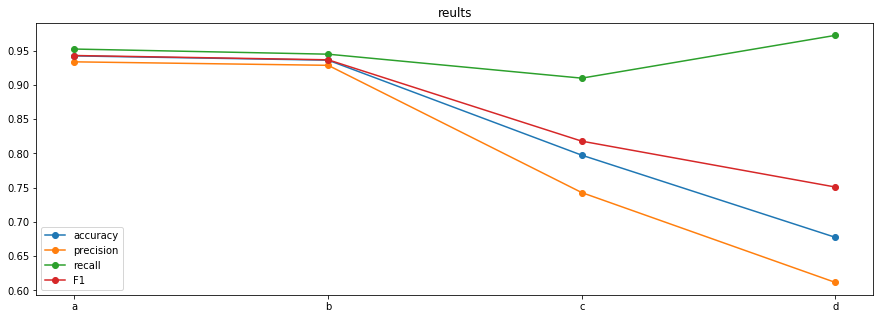

In [14]:
labels = ["a","b","c","d"]
plt.figure(figsize=(15, 5))
plt.plot(labels,evaluation['accuracy'], '-o', label="accuracy")
plt.plot(labels,evaluation['precision'], '-o', label="precision")
plt.plot(labels,evaluation['recall'], '-o', label="recall")
plt.plot(labels,evaluation['F1'], '-o', label="F1")
plt.title("reults")
plt.legend(loc="lower left")
plt.show()

<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
<b>۸)در گزارش خود مقادیر به دست آمده در بخش قبل را تحلیل کنید.</b>
    <br/>
   در حالت a که از هم از پیش پردازش و هم از smoothing استفاده شد نتایج بهتری به دست آمده است همچنین از آن جا که نتایج b از c بهتر است می توان گفت تاثیر smoothing در این داده ها بهتر از پیش پردازش بوده است.در قسمت آخر تمام معیار ها کمتر از مقادیر قبلی است به جز recall همان طور که قبلا نیز گفته شد recall به تنهایی معیار درستی برای سنجش مدل نیست در واقع می توان حدس زد که در حالت آخر بیش تر داده ها به کلاس recommended اختصاص داده شده اند  و کمی جهت گیری صورت گرفته است. اگر به روند داده ها در جدول توجه کنیم متوجه می شویم هر چه مدل بهتر باشد این معیار ها اعداد نزدیک تری به یکدیگر به دست می آید در حالی که در حالت آخر اختلاف میان معیار ها بیشتر دیده می شود.
    <br/>
   <b> ۹) در گزارش خود ۵ مورد از کامنت هایی که در داده ی تست هستند و مدل شما آن ها را به اشتباه تشخیص داده است بیاورید(در حالتی که از پیش پردازش و smoothing استفاده شده است)
    به نظر شما چه بخش یا بخش هایی از راه حلی که پیش گرفتیم باعث شده این موارد اشتباه تشخیص داده شوند؟
</b>
</div>

In [19]:
nb = Naive_bayes(0.6)
train_data = nb.process_data(train)
test_data = nb.process_data(test)
result = nb.classify_data(train_data,test_data)
compare_df = test.copy()
compare_df['prediction'] = result.prediction
different = compare_df[compare_df['prediction']!=compare_df['recommend']][:5]
different

    


,title,comment,recommend,prediction
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended,recommended
8,نقد پس از خرید,سلام ، راحت شدم از کابل شارژ ، توصیه میشود به ...,recommended,not_recommended
19,خیالم راحت شد,فندک قبلیم مدام فیوز میسوزوند و یک بار شارژر م...,recommended,not_recommended
69,بررسی فیلتر سرکان,من خودم جزو افرادی بودم که نزدیک سیزده ساله از...,not_recommended,recommended
83,چراغ چک موتور خاموش شد,سلام دوستان بعد از استفاده چراغ چک تویوتا کمری...,recommended,not_recommended


<div style="direction:rtl;font-size: 17px;text-align: justify;line-height: 1.6;padding-bottom:3px;paddingtop:8px;">
ممکن است در پیش پردازش لغاتی حدف شده باشند که در صورت بودن به بهتر شدن مدل کمک میکردند.همچنین احتمال همه ی حروف استفاده شده در داده های تست را نمی دانستیم و در جایی که لغتی وجود نداشت به کمک smoothing و با استفاده از آلفا  برای آن احتمالی در نظر گرفته می شد.
</div>